<a href="https://colab.research.google.com/github/VenkataSunil18/Plant_Disease_Detection_Using_DeepLearning/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The link you provided seems to be a dataset link. You can access the dataset by visiting this URL: https://datasetninja.com/rice-disease

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubham2703/five-crop-diseases-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'five-crop-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/five-crop-diseases-dataset


In [ ]:
# ============================================
# Download Five Crop Diseases Dataset from Kaggle using kagglehub
# Dataset: https://www.kaggle.com/datasets/shubham2703/five-crop-diseases-dataset
# ============================================

# Step 1️⃣: Install KaggleHub (if not already installed)
!pip install -q kagglehub

# Step 2️⃣: Import library
import kagglehub
import os

# Step 3️⃣: Download the dataset
print("Downloading dataset...")
path = kagglehub.dataset_download("shubham2703/five-crop-diseases-dataset")

print("\n✅ Download complete!")
print("Path to dataset files:", path)

# Step 4️⃣: Check files
print("\nFiles in dataset directory:")
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}{f}")

# Step 5️⃣: (Optional) Move dataset to your working directory
# Example: Move to "dataset/train" folder if you want to train MRW-CNN model
target_dir = "dataset"
os.makedirs(target_dir, exist_ok=True)

os.system(f"cp -r {path}/* {target_dir}/")

print("\n✅ Dataset copied to:", target_dir)

Using Colab cache for faster access to the 'five-crop-diseases-dataset' dataset.

✅ Download complete!
Path to dataset files: /kaggle/input/five-crop-diseases-dataset

Files in dataset directory:
five-crop-diseases-dataset/
  Crop Diseases Dataset/
    Info.txt
    Crop Diseases/
      Crop___Disease/
        Wheat/
          Wheat___Yellow_Rust/
            Yellow_rust762.jpg
            Yellow_rust777.jpg
            Yellow_rust1024.jpg
            Yellow_rust811.jpg
            Yellow_rust617.jpg
          Wheat___Brown_Rust/
            Brown_rust617.jpg
            Brown_rust285.jpg
            Brown_rust176.jpg
            Brown_rust1073.jpg
            Brown_rust394.jpg
          Wheat___Healthy/
            Healthy1025.jpg
            Healthy236.jpg
            Healthy661.jpg
            Healthy200.jpg
            Healthy1129.jpg
        sugarcane/
          Bacterial Blight/
            S_BLB (32).JPG
            S_BLB (21).JPG
            S_BLB (86).JPG
            S_BLB (100

In [ ]:
# Define dataset path (update to match your environment)
DATASET_DIR = "/content/dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80/20 train-validation split
)

# The dataset structure is nested, with crops as subdirectories of DATASET_DIR,
# and then disease classes as subdirectories of crops.
# We need to point the generator to the 'Crop___Disease' folder which contains all the class folders.
train_gen = train_datagen.flow_from_directory(
    DATASET_DIR, # Point to the correct subdirectory
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    DATASET_DIR, # Point to the correct subdirectory
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 10661 images belonging to 5 classes.
Found 2663 images belonging to 5 classes.


In [ ]:
print("Detected classes:", train_gen.class_indices)
print("Training samples:", train_gen.samples)
print("Validation samples:", val_gen.samples)

Detected classes: {'Corn': 0, 'Potato': 1, 'Rice': 2, 'Wheat': 3, 'sugarcane': 4}
Training samples: 10661
Validation samples: 2663


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_simple_cnn(input_shape, num_classes):
    """
    Builds a simple convolutional neural network model.

    Args:
        input_shape (tuple): The shape of the input images (height, width, channels).
        num_classes (int): The number of output classes.

    Returns:
        tensorflow.keras.models.Sequential: The CNN model.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_simple_cnn(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), num_classes=train_gen.num_classes)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 329s 960ms/step - accuracy: 0.7668 - loss: 0.7812 - val_accuracy: 0.9290 - val_loss: 0.2171
Epoch 2/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 285s 851ms/step - accuracy: 0.9435 - loss: 0.1740 - val_accuracy: 0.9305 - val_loss: 0.2457
Epoch 3/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 284s 851ms/step - accuracy: 0.9599 - loss: 0.1331 - val_accuracy: 0.9591 - val_loss: 0.1014
Epoch 4/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 282s 846ms/step - accuracy: 0.9668 - loss: 0.1055 - val_accuracy: 0.9598 - val_loss: 0.1151
Epoch 5/5
334/334 ━━━━━━━━━━━━━━━━━━━━ 282s 844ms/step - accuracy: 0.9682 - loss: 0.1020 - val_accuracy: 0.9624 - val_loss: 0.1238


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_simple_cnn(input_shape, num_classes):
    """
    Builds a simple convolutional neural network model.

    Args:
        input_shape (tuple): The shape of the input images (height, width, channels).
        num_classes (int): The number of output classes.

    Returns:
        tensorflow.keras.models.Sequential: The CNN model.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Replace build_mrw_cnn with build_simple_cnn
model = build_simple_cnn(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), num_classes=len(train_gen.class_indices))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,398,661 (169.37 MB)

 Trainable params: 44,398,661 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
loss, acc = model.evaluate(val_gen)
print(f"✅ Validation Accuracy: {acc*100:.2f}%")

84/84 ━━━━━━━━━━━━━━━━━━━━ 45s 527ms/step - accuracy: 0.1243 - loss: 1.6136
✅ Validation Accuracy: 11.64%


In [ ]:
import os

# Root path in Colab
dataset_root = "/content/dataset/Crop Diseases Dataset/Crop Diseases"

# List first level folders (crops)
print(os.listdir(dataset_root))

['Crop___Disease']


Found 17 classes.


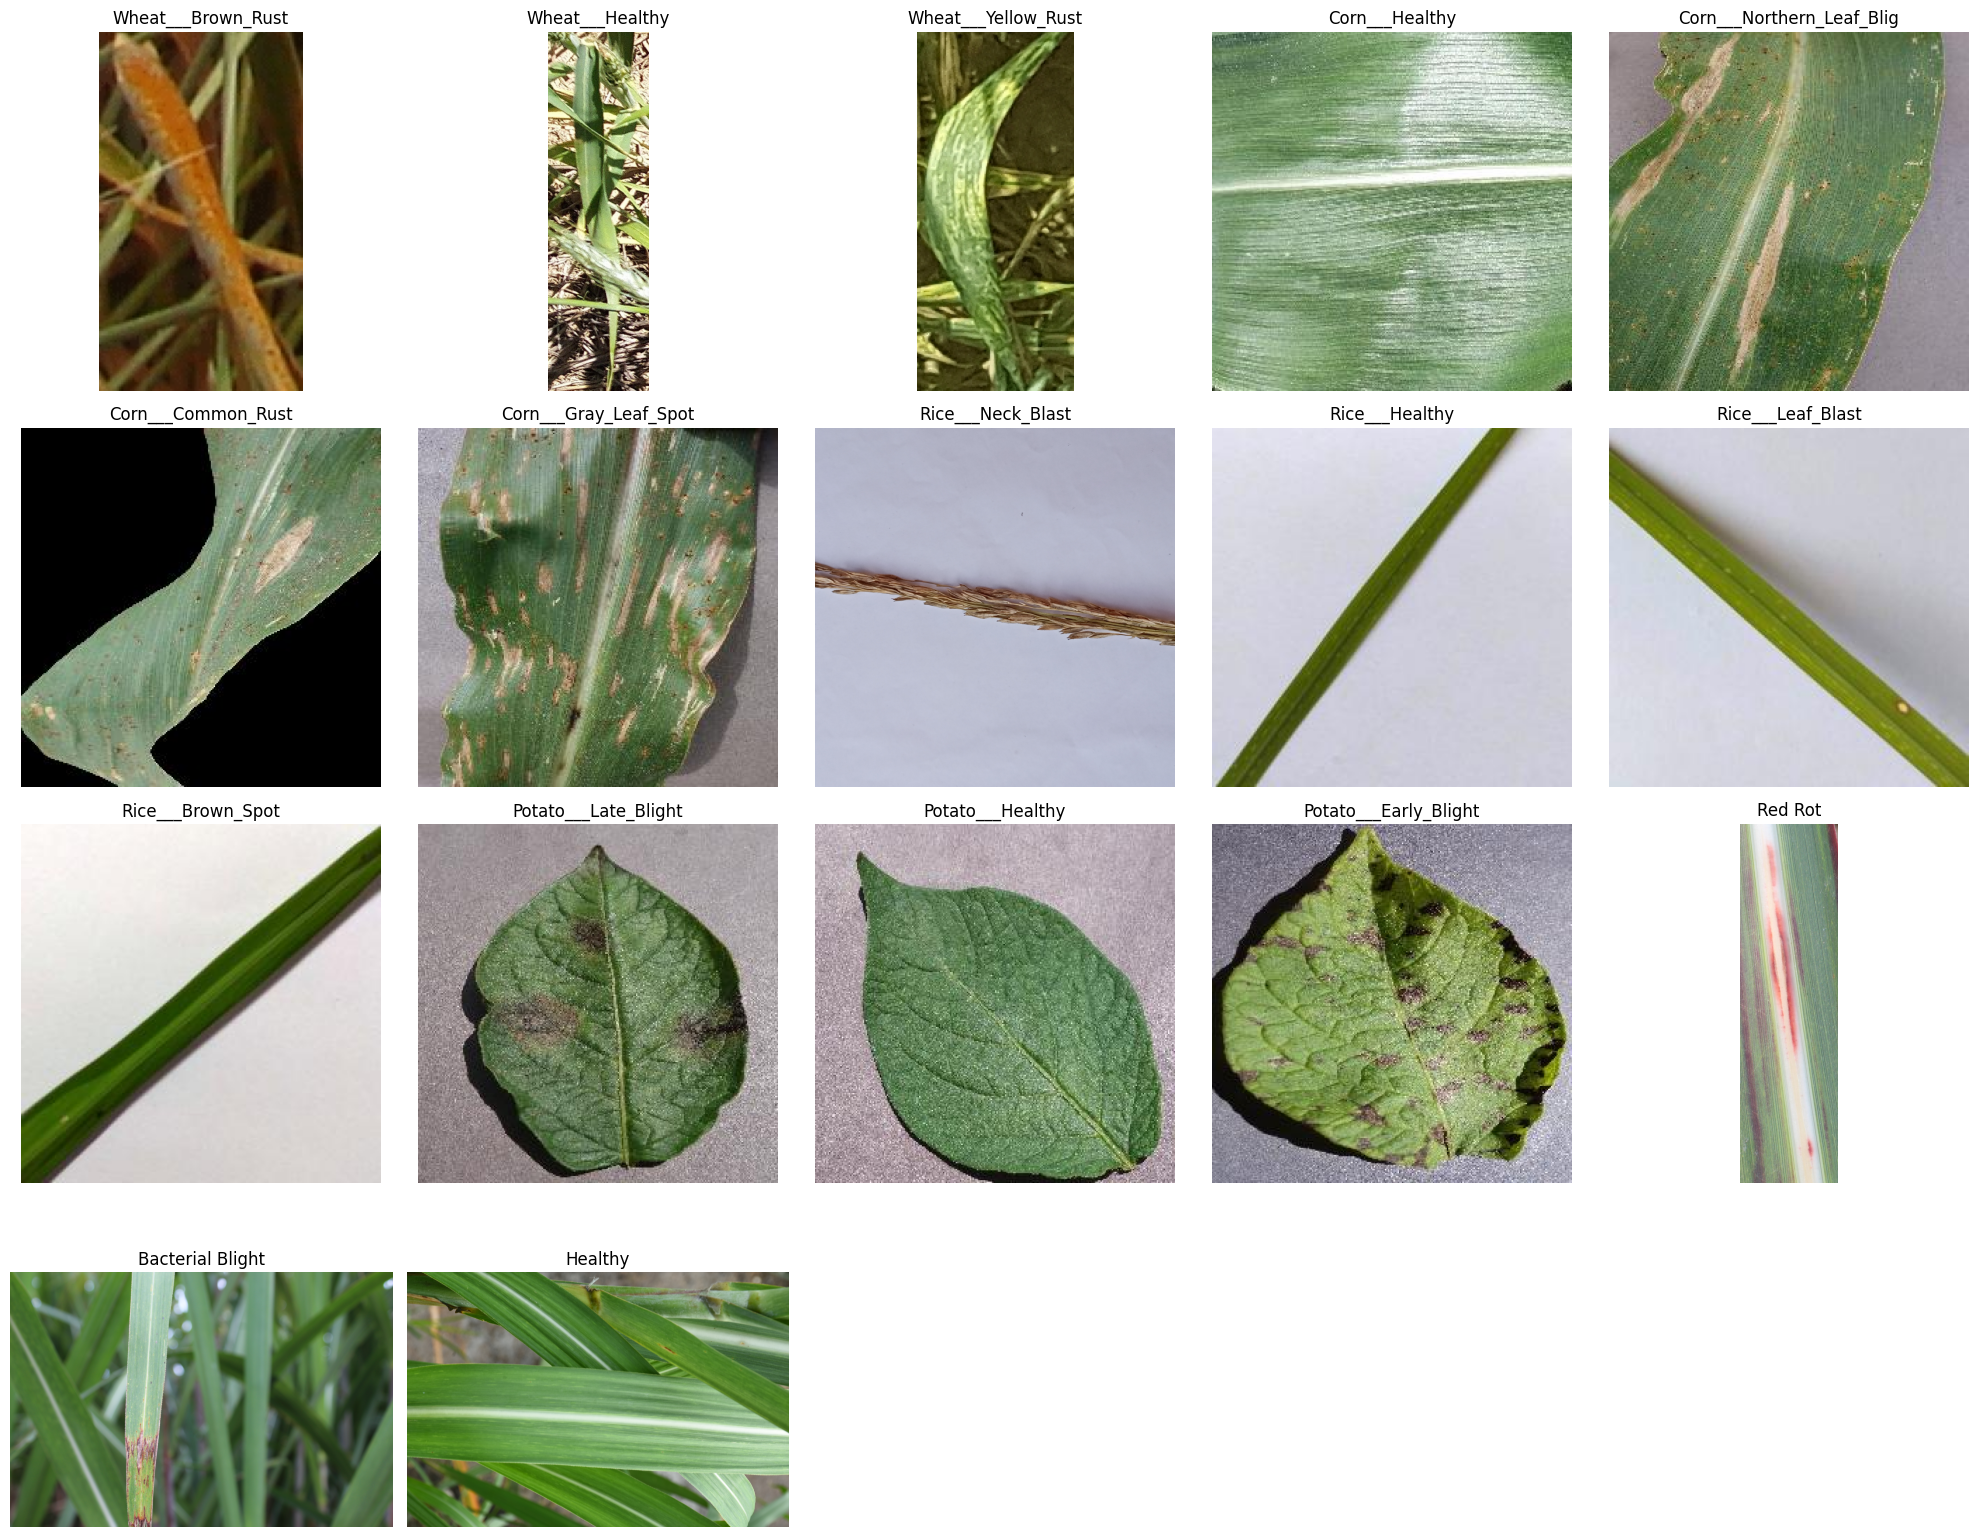

In [ ]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random
import math

# Root folder
dataset_root = Path("/content/dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease")

# Get all class folders
class_folders = [f for crop in dataset_root.iterdir() if crop.is_dir()
                 for f in crop.iterdir() if f.is_dir()]

print(f"Found {len(class_folders)} classes.")

# Plot all classes
num_classes = len(class_folders)
cols = 5
rows = math.ceil(num_classes / cols)
plt.figure(figsize=(cols*4, rows*4))

for i, folder in enumerate(class_folders):
    # Get all common image extensions
    images = []
    for ext in ["*.jpg","*.JPG","*.jpeg","*.png","*.PNG"]:
        images.extend(folder.glob(ext))

    if not images:
        print(f"No images in {folder}")
        continue

    img_path = random.choice(images)
    img = Image.open(img_path)

    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(folder.name[:25])  # truncate long names

plt.tight_layout()
plt.show()

In [ ]:
# EfficientNet model library
!pip install timm --quiet

In [ ]:
import os
import random
from pathlib import Path
from collections import Counter

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import timm
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# Root path to your dataset in Colab
DATA_ROOT = Path("/content/dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease")

# Check crops
crops = [f.name for f in DATA_ROOT.iterdir() if f.is_dir()]
print("Crops found:", crops)

Crops found: ['Wheat', 'Corn', 'Rice', 'Potato', 'sugarcane']


In [ ]:
samples = []
classes = []

for crop in DATA_ROOT.iterdir():
    if crop.is_dir():
        for class_folder in crop.iterdir():
            if class_folder.is_dir():
                classes.append(class_folder.name)
                for ext in ["*.jpg","*.JPG","*.jpeg","*.png"]:
                    for img_path in class_folder.glob(ext):
                        samples.append((str(img_path), class_folder.name))

classes = sorted(list(set(classes)))
print(f"Total images: {len(samples)}, Total classes: {len(classes)}")

Total images: 13324, Total classes: 17


In [ ]:
def stratified_split(samples, val_frac=0.2, seed=42):
    by_label = {}
    for p,l in samples:
        by_label.setdefault(l, []).append(p)
    train_list = []
    val_list = []
    rng = random.Random(seed)
    for label, paths in by_label.items():
        rng.shuffle(paths)
        n_val = max(1,int(len(paths)*val_frac))
        val_paths = paths[:n_val]
        train_paths = paths[n_val:]
        train_list += [(p,label) for p in train_paths]
        val_list += [(p,label) for p in val_paths]
    rng.shuffle(train_list)
    rng.shuffle(val_list)
    return train_list, val_list

train_samples, val_samples = stratified_split(samples, val_frac=0.18)
print(f"Train samples: {len(train_samples)}, Val samples: {len(val_samples)}")

Train samples: 10931, Val samples: 2393


In [ ]:
IMG_SIZE = 224

train_tfms = transforms.Compose([
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.6,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(0.3,0.3,0.2,0.02),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

val_tfms = transforms.Compose([
    transforms.Resize(int(IMG_SIZE*1.1)),
    transforms.CenterCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

label2idx = {c:i for i,c in enumerate(classes)}

class CropDiseaseDataset(Dataset):
    def __init__(self, samples, label2idx, transform=None):
        self.samples = samples
        self.label2idx = label2idx
        self.transform = transform
    def __len__(self):
        return len(self.samples)
    def __getitem__(self, idx):
        path,label = self.samples[idx]
        img = Image.open(path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, self.label2idx[label]

# Create PyTorch datasets
train_ds = CropDiseaseDataset(train_samples, label2idx, transform=train_tfms)
val_ds   = CropDiseaseDataset(val_samples, label2idx, transform=val_tfms)

# DataLoaders
BATCH_SIZE = 32
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_NAME = "efficientnet_b0"

model = timm.create_model(MODEL_NAME, pretrained=True, num_classes=len(classes))
model = model.to(DEVICE)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)

In [ ]:
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    for imgs, labels in tqdm(loader, desc="Train", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*imgs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds==labels).sum().item()
        total += imgs.size(0)
    return running_loss/total, correct/total

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in tqdm(loader, desc="Val", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()*imgs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds==labels).sum().item()
            total += imgs.size(0)
    return running_loss/total, correct/total

In [ ]:
NUM_EPOCHS = 5
best_val_loss = float('inf')

for epoch in range(1, NUM_EPOCHS+1):
    print(f"\nEpoch {epoch}/{NUM_EPOCHS}")
    train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, DEVICE)
    val_loss, val_acc = validate(model, val_loader, criterion, DEVICE)
    print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save({"model_state_dict": model.state_dict(), "classes": classes}, "/content/best_model.pth")
        print("Saved best model!")


Epoch 1/5


Train Loss: 0.4208, Acc: 0.8598
Val   Loss: 0.1951, Acc: 0.9348
Saved best model!

Epoch 2/5


Train:  24%|██▎       | 81/342 [00:57<02:02,  2.13it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
import torch.nn as nn
import timm

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

DEL_NAME = "efficientnet_b0"

model = timm.create_model(MODEL_NAME, pretrained=True, num_classes=len(classes))
model = model.to(DEVICE)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)

In [ ]:
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0
    correct = 0
    total = 0
    for imgs, labels in tqdm(loader, desc="Train", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*imgs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds==labels).sum().item()
        total += imgs.size(0)
    return running_loss/total, correct/total

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for imgs, labels in tqdm(loader, desc="Val", leave=False):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()*imgs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds==labels).sum().item()
            total += imgs.size(0)
    return running_loss/total, correct/total

In [ ]:
def predict_image(image_path, model, classes, transform=val_tfms):
    img = Image.open(image_path).convert("RGB")
    inp = transform(img).unsqueeze(0).to(DEVICE)
    model.eval()
    with torch.no_grad():
        out = model(inp)
        probs = torch.nn.functional.softmax(out, dim=1)[0]
        topk = torch.topk(probs, k=3)
    return [(classes[i], float(probs[i])) for i in topk.indices]

# Load best model
ck = torch.load("/content/best_model.h5")
model.load_state_dict(ck["model_state_dict"])
example_img = train_samples[1][0]  # pick first training image
print("Prediction:", predict_image(example_img, model, ck["classes"]))


Prediction: [('Rice___Healthy', 0.8468443155288696), ('Rice___Brown_Spot', 0.12871050834655762), ('Rice___Leaf_Blast', 0.017792243510484695)]


Found 17 classes.


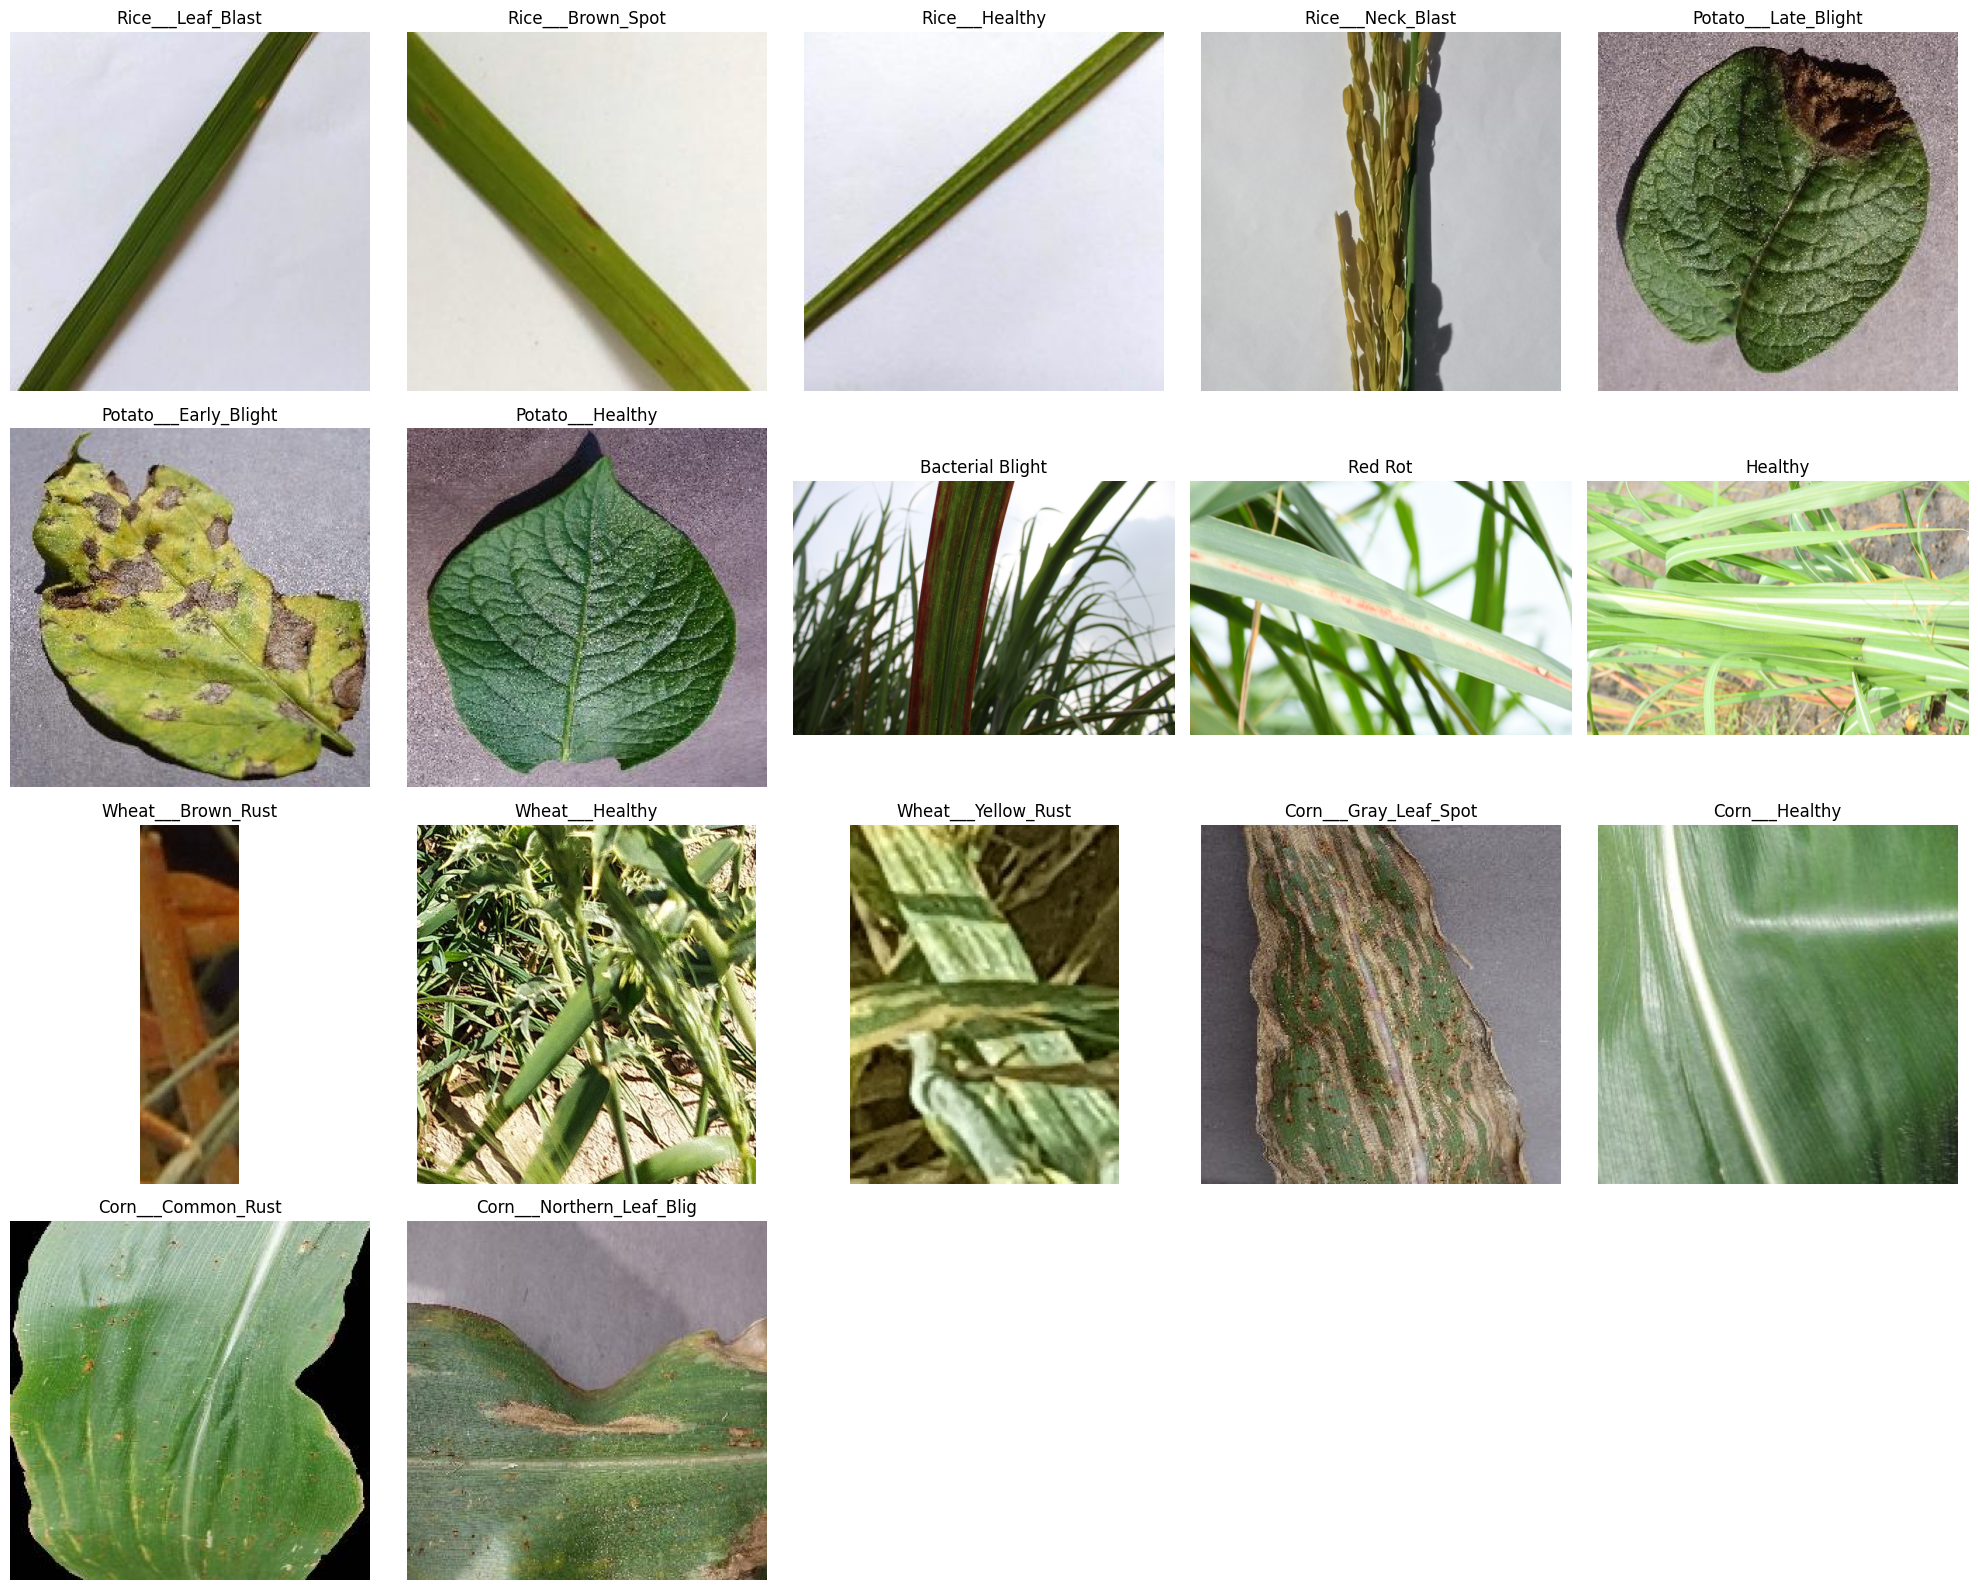

In [ ]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import random
import math

# Root folder
dataset_root = Path("/content/dataset/Crop Diseases Dataset/Crop Diseases/Crop___Disease")

# Get all class folders
class_folders = [f for crop in dataset_root.iterdir() if crop.is_dir()
                 for f in crop.iterdir() if f.is_dir()]

print(f"Found {len(class_folders)} classes.")

# Plot all classes
num_classes = len(class_folders)
cols = 5
rows = math.ceil(num_classes / cols)
plt.figure(figsize=(cols*4, rows*4))

for i, folder in enumerate(class_folders):
    # Get all common image extensions
    images = []
    for ext in ["*.jpg","*.JPG","*.jpeg","*.png","*.PNG"]:
        images.extend(folder.glob(ext))

    if not images:
        print(f"No images in {folder}")
        continue

    img_path = random.choice(images)
    img = Image.open(img_path)

    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(folder.name[:25])  # truncate long names

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

def predict_and_show(image_path, model, classes, transform=val_tfms, device=DEVICE):
    # Load image
    img = Image.open(image_path).convert("RGB")

    # Transform image
    inp = transform(img).unsqueeze(0).to(device)

    # Predict
    model.eval()
    with torch.no_grad():
        out = model(inp)
        probs = torch.nn.functional.softmax(out, dim=1)[0]
        topk = torch.topk(probs, k=3)

    # Display image
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Print top 3 predictions
    print("Top 3 Predictions:")
    for i, p in zip(topk.indices, topk.values):
        print(f"{classes[i]} : {p:.4f}")


In [ ]:
# Load best saved model
ck = torch.load("/content/best_model.h5")
model.load_state_dict(ck["model_state_dict"])
model = model.to(DEVICE)
classes = ck["classes"]


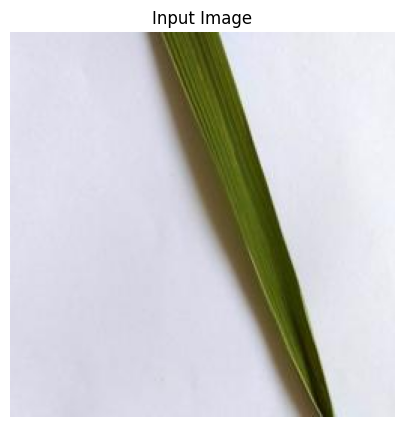

Top 3 Predictions:
Rice___Healthy : 0.9092
Rice___Leaf_Blast : 0.0752
Rice___Brown_Spot : 0.0136


In [ ]:
# Example: pick middle image from training set
middle_index = len(train_samples)//2
test_image = train_samples[middle_index][0]

predict_and_show(test_image, model, classes)


Please upload an image for disease prediction:


Saving Alternaria Leaf resized.jpg to Alternaria Leaf resized.jpg


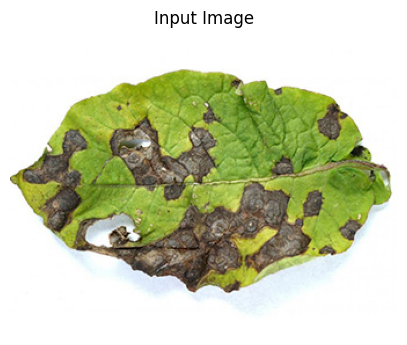

Top 3 Predictions:
Potato___Late_Blight : 0.7536
Potato___Early_Blight : 0.1720
Wheat___Healthy : 0.0678


In [ ]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import torch

def predict_and_show(image_path, model, classes, transform=val_tfms, device=DEVICE):
    # Load image
    img = Image.open(image_path).convert("RGB")

    # Transform image
    inp = transform(img).unsqueeze(0).to(device)

    # Predict
    model.eval()
    with torch.no_grad():
        out = model(inp)
        probs = torch.nn.functional.softmax(out, dim=1)[0]
        topk = torch.topk(probs, k=3)

    # Display image
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Print top 3 predictions
    print("Top 3 Predictions:")
    for i, p in zip(topk.indices, topk.values):
        print(f"{classes[i]} : {p:.4f}")

# --------- RUNTIME UPLOAD & PREDICTION ----------
print("Please upload an image for disease prediction:")
uploaded = files.upload()  # runtime file picker

# Get uploaded image path
image_path = list(uploaded.keys())[0]

# Predict disease
predict_and_show(image_path, model, classes)


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import torch
from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import timm # Import timm for model creation

# ✅ Define your device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Example transforms (adjust to match your model training)
val_tfms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# ✅ Load your trained model
# Load the saved checkpoint dictionary
checkpoint = torch.load("/content/best_model.h5", map_location=DEVICE) # Corrected file extension to .h5

# Initialize the model architecture (assuming EfficientNetB0 was used)
MODEL_NAME = "efficientnet_b0" # Ensure this matches the trained model's name
model = timm.create_model(MODEL_NAME, pretrained=False, num_classes=len(checkpoint["classes"])) # Create model with correct number of classes
model.load_state_dict(checkpoint["model_state_dict"]) # Load the state dictionary
model.to(DEVICE)
model.eval()

# ✅ Define class names from the loaded checkpoint
classes = checkpoint["classes"]

# ✅ Define prediction function
def predict_image(img):
    img = img.convert("RGB")
    inp = val_tfms(img).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        out = model(inp)
        probs = F.softmax(out, dim=1)[0]
        top3 = torch.topk(probs, k=3)
    results = {classes[i]: float(p) for i, p in zip(top3.indices, top3.values)}
    return results

# ✅ Create Gradio interface
iface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil", label="Upload Crop/Plant Image"),
    outputs=gr.Label(num_top_classes=3, label="Top Predictions"),
    title="🌿 Plant Disease Prediction",
    description="Upload a leaf image to identify its disease using a trained deep learning model."
)

# ✅ Launch the app
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fb86cb6f7a3ade514c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
